<a href="https://colab.research.google.com/github/ArvindRajen/Facial_Recognition_With_AI/blob/master/Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Facial Recognition**

Exploring Facial recognition on a small dataset of 40 Faces and using different machine learning to see how they performance.

There can be no two similar fingerprints in the World but there sure can be more than 10 familiar and similar faces out of the 7 billion people on Earth. So how does AI even begin to differentiate people when even people have trouble recognizing other people. This project shows what insights I got on AI when it comes to recognizing people.

In [1]:
#Starting with importing the basic Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#Loading the Data and Displaying It

In [2]:
#LOADING DATASET
pics = np.load("olivetti_faces.npy")
labels = np.load("olivetti_faces_target.npy")
print("pics: ", pics.shape)
print("labels: ", labels.shape)


pics:  (400, 64, 64)
labels:  (400,)


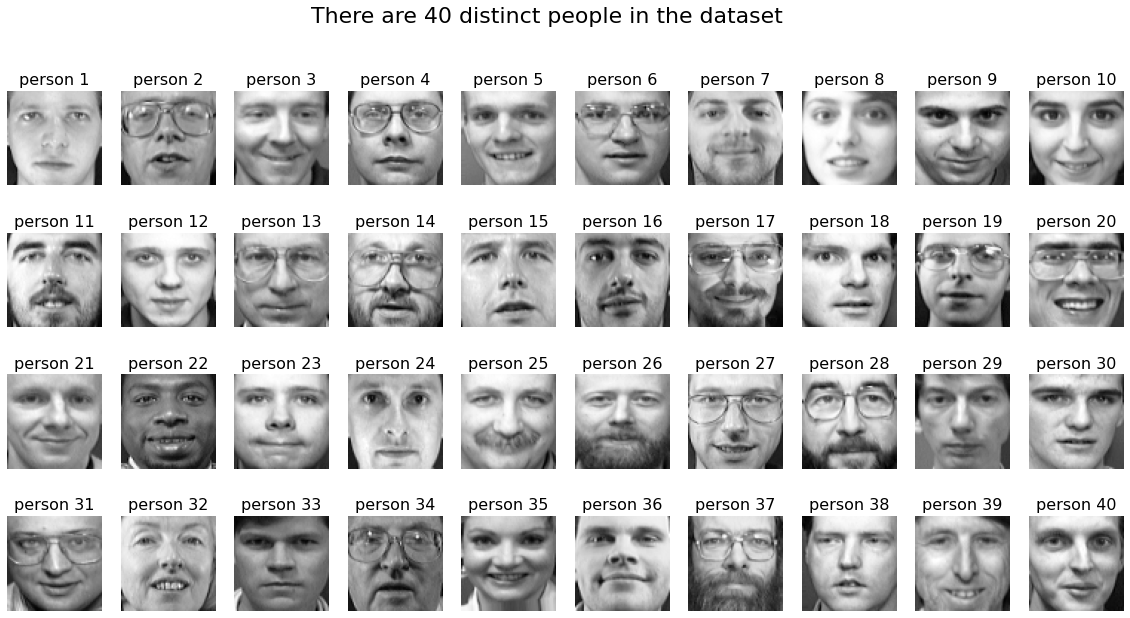

In [3]:
#Plotting The faces Using Matplotlib
fig = plt.figure(figsize=(20, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=16)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct people in the dataset", fontsize=22)
plt.show()


#Each Person in the Dataset has **10** images of himself from different angles which make up the 400 data points


In [4]:
#ten images of one person

Xdata = pics # store images in Xdata
Ydata = labels.reshape(-1,1) # store labels in Ydata


#SPLITTING OF DATASET 20% for test set and 80% training set

In [5]:
#SPLITTING OF DATASET 20% for test set and 80% training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.2, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)



x_train:  (320, 64, 64)
x_test:  (80, 64, 64)
y_train:  (320, 1)
y_test:  (80, 1)


In [6]:
"""Need to convert the data from matrix form to vector form"""
#RESHAPE
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


x_train:  (320, 4096)
x_test:  (80, 4096)
y_train:  (320, 1)
y_test:  (80, 1)


#Doing PCA to extract Components that can be used to Differentiate the faces.

Xpca shape: (400, 4096)


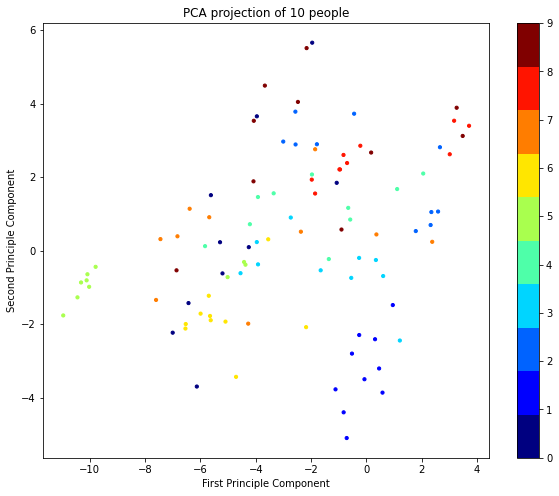

In [7]:
#PCA

Xpca=Xdata.reshape((Xdata.shape[0],Xdata.shape[1]*Xdata.shape[2]))
print("Xpca shape:", Xpca.shape)

from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(Xpca)
X_pca=pca.transform(Xpca)

number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,2], 
            c=labels[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)


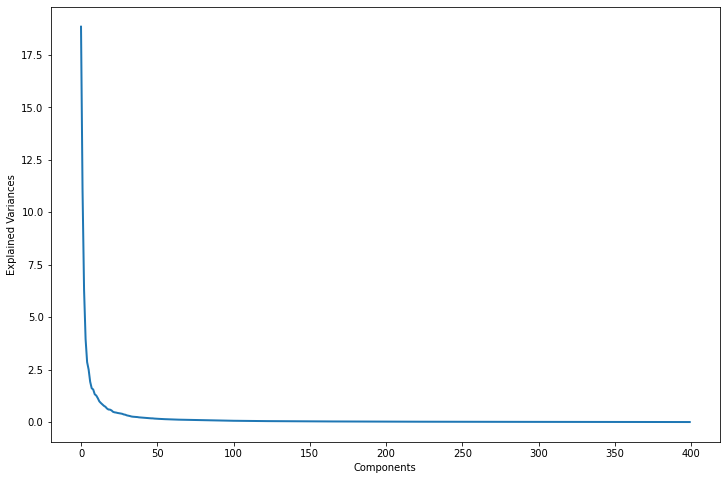

In [8]:
#to find optimum number of principal components
pca=PCA()
pca.fit(Xpca)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()


#Choosing 40 Components Derived from the Elbow Graph above and Point deviates the most at 40

In [9]:
#choosing the number of components as 40 
components=40
pca=PCA(n_components=components, whiten=True)
pca.fit(x_train)

X_train_pca=pca.transform(x_train)
X_test_pca=pca.transform(x_test)


In [10]:
# Store accuracies of various models for comparison at the end

list_names = []
list_accuracy = []


#Using An SVM Classifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy for SVM classifier is 95.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         0
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      

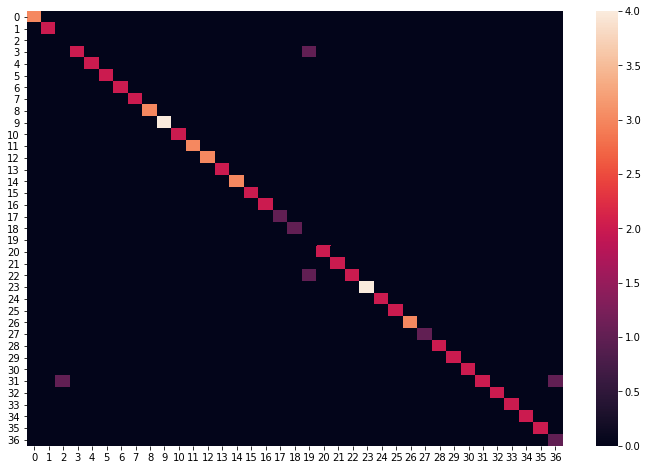

In [11]:
#SVM Classifier
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()
svc.fit(X_train_pca,y_train)
ypred_svc=svc.predict(X_test_pca)
SVM_accuracy = round(svc.score(X_test_pca, y_test)*100,2)
print("The accuracy for SVM classifier is" ,SVM_accuracy,"%")

print(metrics.classification_report(y_test, ypred_svc))
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, ypred_svc))
list_names.append("SVM Classifier")
list_accuracy.append(SVM_accuracy)


#Using A Random Forest Classifier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


The accuracy for Random Forest is % 95.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
          20       0.50      1.00      0

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Accuracy:0.0, Best Parameters:{'min_samples_split': 608, 'min_samples_leaf': 1, 'max_leaf_nodes': 4, 'max_features': 27, 'max_depth': 159, 'criterion': 'gini'}
{'min_samples_split': 608, 'min_samples_leaf': 1, 'max_leaf_nodes': 4, 'max_features': 27, 'max_depth': 159, 'criterion': 'gini'}
The Training Accuracy is 3.12 %
The Test Accuracy is 0.0 %


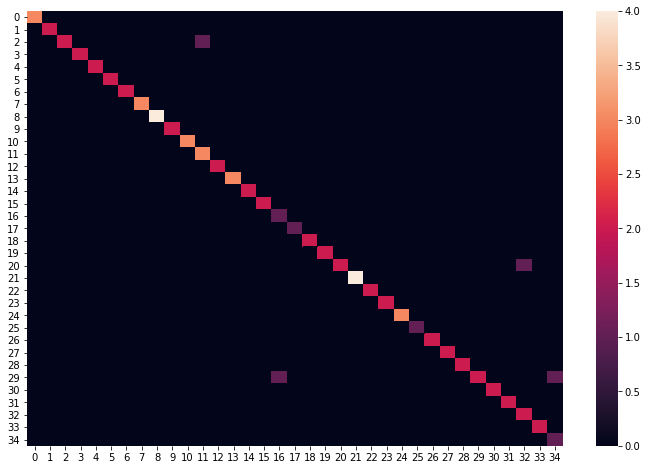

In [12]:

#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(X_train_pca, y_train)
RF_accuracy = round(rf.score(X_test_pca, y_test)*100,2)
print("The accuracy for Random Forest is %", RF_accuracy)
ypred_rf=rf.predict(X_test_pca)

print(metrics.classification_report(y_test, ypred_rf))
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, ypred_rf))

#cross validation to selecct the tuning parameters
from sklearn.model_selection import RandomizedSearchCV


random_forest =  RandomForestClassifier(random_state=0)
param_grid_forest = {"max_depth": range(1,500,2), "max_features": range(20, 39),
              "min_samples_split": range(80, 1000, 2), "min_samples_leaf": [1, 3, 10],
              "criterion": ["gini", "entropy"], "max_leaf_nodes": range(2, 10, 2)}

gsearch_forest = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid_forest,
                                                 cv = 10, random_state=0)

gsearch_forest= gsearch_forest.fit(X_train_pca, y_train)
score = gsearch_forest.score(X_test_pca, y_test)    

print('Accuracy:{}, Best Parameters:{}'.format(score,gsearch_forest.best_params_))
print(gsearch_forest.best_params_)

print ("The Training Accuracy is",np.round(gsearch_forest.score(X_train_pca, y_train)*100,2),"%")
print ("The Test Accuracy is",np.round(gsearch_forest.score(X_test_pca,y_test)*100,2),"%")



list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)


#Using A KNN Classifier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


The accuracy for KNN is % 95.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
          20       0.50      1.00      0.67       

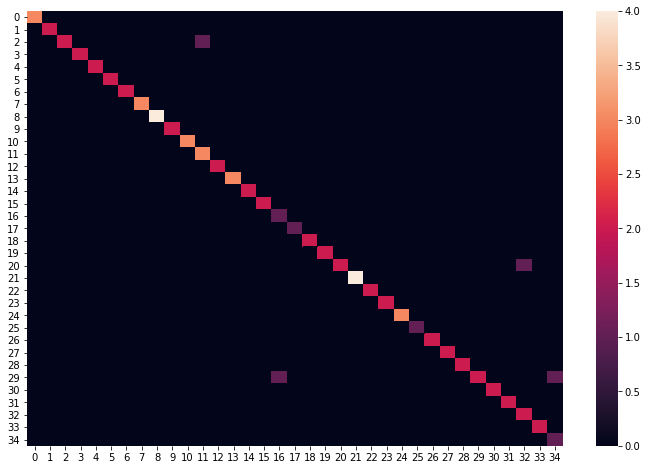

In [13]:
#KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(X_train_pca, y_train)
Knn_accuracy = round(Knn.score(X_test_pca, y_test)*100,2)

print("The accuracy for KNN is %", Knn_accuracy)

ypred_knn=rf.predict(X_test_pca)

print(metrics.classification_report(y_test, ypred_knn))
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, ypred_knn))

list_names.append("KNN")
list_accuracy.append(Knn_accuracy)



#Using A CNN


Finally we Use a Convolutional Neural Network Which is one of the most well known classifiers used for image processing.

In [14]:
#CONVOLUTED NEURAL NETWORK
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)

#Label Encoding
from keras.utils.np_utils import to_categorical 

y_train_ = to_categorical(y_train, num_classes = 40) 
y_test_ = to_categorical(y_test, num_classes = 40)

print("y_train_ shape: ",y_train_.shape)
print("y_test_ shape: ",y_test_.shape)


from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 20, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 50, kernel_size = (6,6),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 150, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.7, 
                                            min_lr=0.00000000001)

epoch = 40
batch_size = 20

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=5,  
        zoom_range = 0.05, 
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=False, 
        vertical_flip=False)  
datagen.fit(x_train)

history = model.fit_generator(
                              datagen.flow(x_train,y_train_, batch_size=batch_size),
                              epochs = epoch, 
                              validation_data = (x_test,y_test_),
                              verbose = 2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction]
                             )

CNN_val_accuracy=history.history['val_accuracy']
CNN_train_accuracy=history.history['accuracy']


x_train:  (320, 64, 64, 1)
x_test:  (80, 64, 64, 1)
y_train_ shape:  (320, 40)
y_test_ shape:  (80, 40)
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
16/16 - 7s - loss: 4.0545 - accuracy: 0.0312 - val_loss: 3.6912 - val_accuracy: 0.0000e+00
Epoch 2/40
16/16 - 7s - loss: 3.6900 - accuracy: 0.0125 - val_loss: 3.7543 - val_accuracy: 0.0000e+00
Epoch 3/40
16/16 - 7s - loss: 3.6890 - accuracy: 0.0312 - val_loss: 3.6909 - val_accuracy: 0.0000e+00
Epoch 4/40
16/16 - 7s - loss: 3.6913 - accuracy: 0.0406 - val_loss: 3.6934 - val_accuracy: 0.0000e+00
Epoch 5/40
16/16 - 7s - loss: 3.7235 - accuracy: 0.0250 - val_loss: 3.6930 - val_accuracy: 0.0000e+00
Epoch 6/40
16/16 - 7s - loss: 3.6792 - accuracy: 0.0406 - val_loss: 3.6941 - val_accuracy: 0.0000e+00
Epoch 7/40
16/16 - 7s - loss: 3.6371 - accuracy: 0.0562 - val_loss: 3.5850 - val_accuracy: 0.0500
Epoch 8/40
16/16 - 7s - loss: 3.4571 - accuracy: 0.1219 - val_loss: 3.0881 - val_accuracy: 0.1500
Epoch 9/40
1

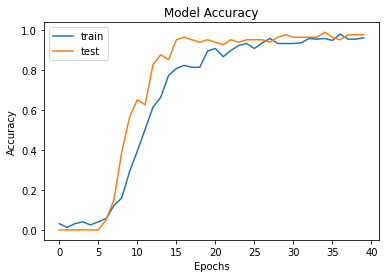

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


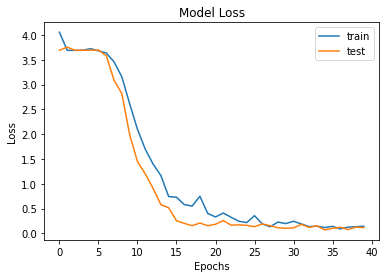

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


In [17]:
print(np.max(CNN_val_accuracy))

CNN_accuracy=np.max(CNN_val_accuracy)*100
list_names.append("CNN")
list_accuracy.append(CNN_accuracy)


0.987500011920929


#Plotting Accuracies of All the Used Classifiers

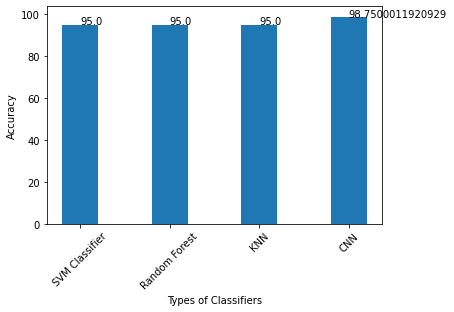

In [18]:
class_name=list_names
class_accuracy=list_accuracy
plt.bar(class_name,class_accuracy, width=0.4, label='class_accuracy')
for a,b in zip(class_name, class_accuracy): 
    plt.text(a, b, str(b))
plt.xticks(rotation = 45)
plt.xlabel("Types of Classifiers")
plt.ylabel("Accuracy")
plt.show()


#Plotting the Learning Curves of all the Classifiers

In [19]:
#learning curves
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [20]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="m",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


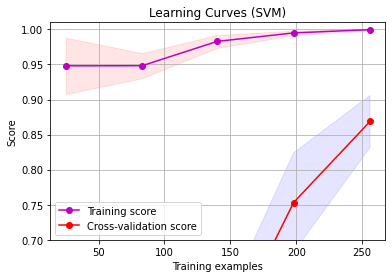

In [21]:
#learning curve of SVM
title = "Learning Curves (SVM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC()
plot_learning_curve(estimator, title, X_train_pca, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


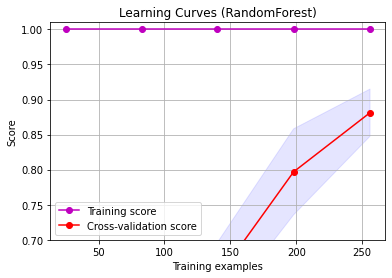

In [22]:
#learning curve of RandomForest
title = "Learning Curves (RandomForest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator2 = RandomForestClassifier(n_estimators = 400, random_state = 1)
plot_learning_curve(estimator2, title, X_train_pca, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


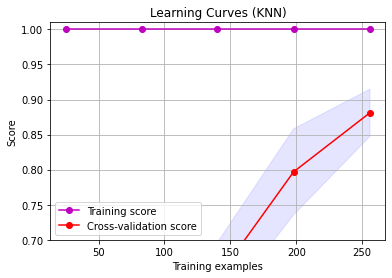

In [23]:
#learning curve of KNN
title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors = 1)
plot_learning_curve(estimator2, title, X_train_pca, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


#Conlcusion

Convolutional Neural Networks (CNN) work best for image classification. Generally, the CNN works best for data with high resolution and CNN would accurately fit the data to the model. And as far as image classification and learning capabilities the CNN algorithm shows great promise.

#References

The dataset for our project has been obtained from Kaggle (https://www.kaggle.com/imrandude/olivetti)
Image Augmentation and increasing accuracy of model by increasing number of data, (https://keras.io/preprocessing/image/)